In [19]:
import os
import zipfile
import json
import requests
import codecs
import json
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

## Extraemos los datos

In [17]:
url = "https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip"
response = requests.get(url)

# Acá podemos escoger la ruta, por ejemplo 'data/databasesLoadData.zip' o dejarlo así
with open("databasesLoadData.zip", "wb") as file:
    file.write(response.content)

## Descomprimimos el archivo

In [18]:
import zipfile
# En donde tenemos el archivo local?
local_zip = 'databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
# En donde lo vamos a extraer? como se llamará la carpeta?
zip_ref.extractall('data')
zip_ref.close()

# Esto es opcional, pero yo prefiero eliminar el archivo zip
os.remove(local_zip)

## Cargamos los datos

In [21]:
json_file = 'data/sign_mnist_json/data.json'
data_json = []

with codecs.open(json_file, 'r', 'utf-8') as js:
    for line in js:
        data_json.append(json.loads(line))
        
print(len(data_json))

9


In [ ]:
data_json[0]

{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg',
 'label': 'b'}

## "Creamos las imagenes" y las mostramos

In [25]:
images = []

for data in data_json:
    response = requests.get(data['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    images.append([img, data['label']])

a


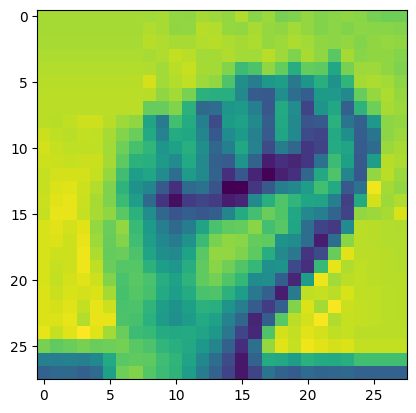

In [35]:
plt.imshow(images[3][0].reshape(28,28))
print(images[3][1])